# MATH 210 Introduction to Mathematical Computing

**March 8, 2024**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

## Heun's Method

Consider a first order differential equation $y' = f(t,y),y(t_0)=y_0$. [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method) (aka. improved Euler's method, trapezoid method, ...) uses the degree 2 Taylor approximation to approximate $y(t)$:

\begin{align*}
h &= t_{n+1} - t_n \\
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n + h, y_n + k_1 h) \\
y_{n+1} &= y_n + \left( \frac{k_1 + k_2}{2} \right) h
\end{align*}

Write a function called `odeHeun` which takes input parameters `f`, `t` and `y0` where:

* `f` is a Python function which represents the right hand side of $y' = f(t,y)$
* `t` is a vector of $t$ values where the first entry `t[0]` is $t_0$
* `y0` is the initial value $y(t_0) = y_0$

The function returns the vector of $y$ values given by Heun's method.

In [23]:
def odeHeun(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n + 1],y[n] + k1*h)
        y[n + 1] = y[n] + (k1 + k2)/2*h
    return y

In [24]:
f = lambda t,y: y
t = np.linspace(0,1,2)
y0 = 1
y = odeHeun(f,t,y0)
print(y) # [1.,2.5]

[1.  2.5]


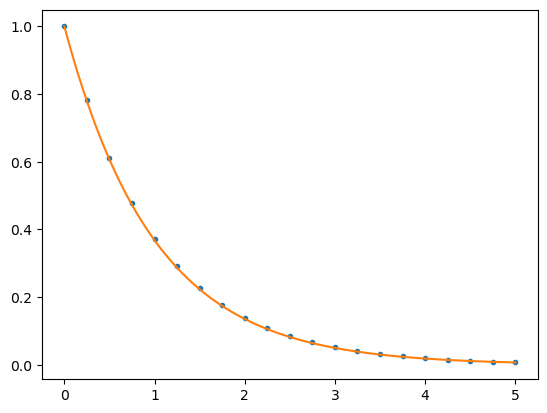

In [28]:
f = lambda t,y: -y
t0 = 0
tf = 5
N = 20
t = np.linspace(t0,tf,N+1)
y0 = 1
y = odeHeun(f,t,y0)
plt.plot(t,y,'.')
t_exact = np.linspace(t0,tf,100)
y_exact = np.exp(-t_exact)
plt.plot(t_exact,y_exact)
plt.show()